<a href="https://colab.research.google.com/github/yangchangnaihoby/AI_7th/blob/master/Project_004_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

In [2]:
img_rows = 28
img_cols = 28

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [6]:
print('x_train shape :', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape : (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
batch_size = 128
num_classes = 10
epochs = 12

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [9]:
import random
import matplotlib.pyplot as plt

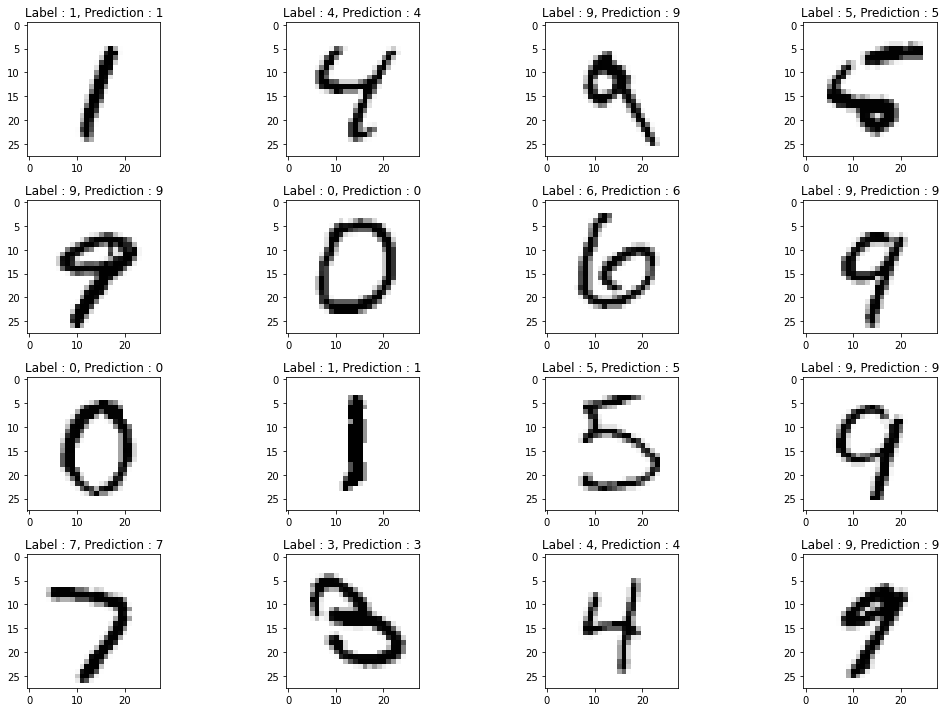

In [11]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis = 1)

test_labels = np.argmax(y_test, axis = 1)

count = 0

plt.figure(figsize = (15, 10))
for n in range(5, 21) :
  count += 1
  plt.subplot(4, 4, count)
  plt.imshow(x_test[n].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
  tmp = 'Label : ' + str(test_labels[n]) + ', Prediction : ' + str(predicted_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()